<a href="https://colab.research.google.com/github/Natanael29/FSI_Practica2_NeuralNetwork/blob/main/PR2_REDES_NEURONALES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Práctica 2 de Fundamentos de los Sistemas Inteligentes: Redes Neuronales

##Descripción del proyecto

  Como sabemos, nos encontramos atravesando una pandemia mundial causada por la enfermedad infecciosa llamada COVID-19. Se trata de una enfermedad que produce síntomas similares a los de la gripe, como la fiebre, tos, dificultad respiratoria, dolor muscular y fatiga. En algunos casos más graves puede llegar a producir neumonía, por lo que en ocasiones, puede resultar difícil diferenciar entre ellas. En nuestro proyecto hemos decidido entrenar una red neuronal que pueda categorizar, a través de imágenes de radiografías de pulmones, si se trata de neumonía, COVID-19, o si por el contrario se trata de unos pulmones sanos.

##Herramientas

  Para poder realizar la práctica, vamos a utilizar Keras, que es una biblioteca de Redes Neuronales de código abierto escrita en Python. Sus características más relevantes se centran en ser amigable para el usuario, modular y extensible. Además, Keras nos proporciona la capacidad de trasladar el cálculo a la GPU en lugar de hacerlo en la CPU, dado que las capacidades de computación paralela se adaptan perfectamente a las necesidades de cálculo de las redes neuronales.

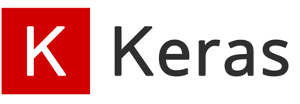


#1. Red Neuronal

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Data source

In [3]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.callbacks import EarlyStopping
import keras
from time import time
from sklearn.metrics import classification_report, confusion_matrix

# DATA SOURCE --------------------------------------------------

batch_size = 32
num_classes = 3

train_data_dir = '/content/drive/MyDrive/dataset/Covid19_TRAIN/train'
validation_data_dir = '/content/drive/MyDrive/dataset/COVID-19_TEST/test'

##Data augmentation

Como sabemos, el data augmentation consiste en aplicar una serie de ligeras modificaciones a las imágenes que forman el dataset con el que vamos a trabajar para aumentar el conjunto de imágenes, como por ejemplo, invertir la imagen ampliarla o incluso rotarla. Como resultado, tendremos más imágenes que ayudarán al clasificador a discernir entre los distintos casos que se presenten, que en el nuestro se trata de diferenciar entre COVID-19, neumonía o pulmones sanos.

El data augmentation se lleva a cabo definiendo una serie de parámetros en la inicialización de la clase ImageDataGenerator. En nuestro caso, nuestra inicialización es la siguiente:


In [4]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=15,
        zoom_range=0.1,
        horizontal_flip=True
)

validation_datagen = ImageDataGenerator(
        rescale=1./255
)

train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(500, 500),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(500, 500),
        batch_size=batch_size,
        class_mode='categorical')

Found 251 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


##Model

In [5]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(500, 500, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))

model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

print("\n-----------------------> Resumen del modelo <---------------------\n")
model.summary()



-----------------------> Resumen del modelo <---------------------

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 498, 498, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 249, 249, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 247, 247, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 123, 123, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 123, 123, 64)      0         
_________________________________________________________________
flatten (Flatten)            (None, 968256)            0         
_____________________________________________________

##Training

In [6]:
epochs = 50

es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=3, restore_best_weights=True)

history = model.fit_generator(
        train_generator,
        epochs=epochs,
        validation_data = validation_generator,
        callbacks = [es]
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
8/8 [==============================] - 156s 17s/step - loss: 1.0725 - accuracy: 0.4849 - val_loss: 1.0486 - val_accuracy: 0.3939
Epoch 2/50
8/8 [==============================] - 115s 14s/step - loss: 1.0409 - accuracy: 0.4559 - val_loss: 1.0128 - val_accuracy: 0.3939
Epoch 3/50
8/8 [==============================] - 116s 14s/step - loss: 0.9906 - accuracy: 0.5012 - val_loss: 0.9694 - val_accuracy: 0.6061
Epoch 4/50
8/8 [==============================] - 119s 15s/step - loss: 0.9496 - accuracy: 0.5828 - val_loss: 0.9333 - val_accuracy: 0.6515
Epoch 5/50
8/8 [==============================] - 119s 15s/step - loss: 0.9263 - accuracy: 0.6042 - val_loss: 0.8997 - val_accuracy: 0.7273
Epoch 6/50
8/8 [==============================] - 115s 14s/step - loss: 0.9094 - accuracy: 0.6486 - val_loss: 0.8661 - val_accuracy: 0.6667
Epoch 7/50
8/8 [==============================] - 116s 14s/step - loss: 0.8368 - accuracy: 0.7160 - val_loss: 0.8428 - val_accuracy: 0.7576
Epoch 8/50
8/8 [====

##Plot

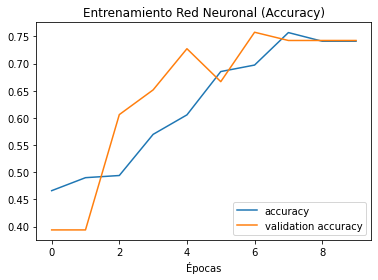

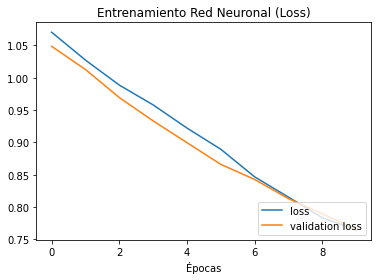

----------Confusion Matrix----------
[[11 11  4]
 [ 9  9  2]
 [ 8  5  7]]
ROC AUC score: 0.5533026755852842


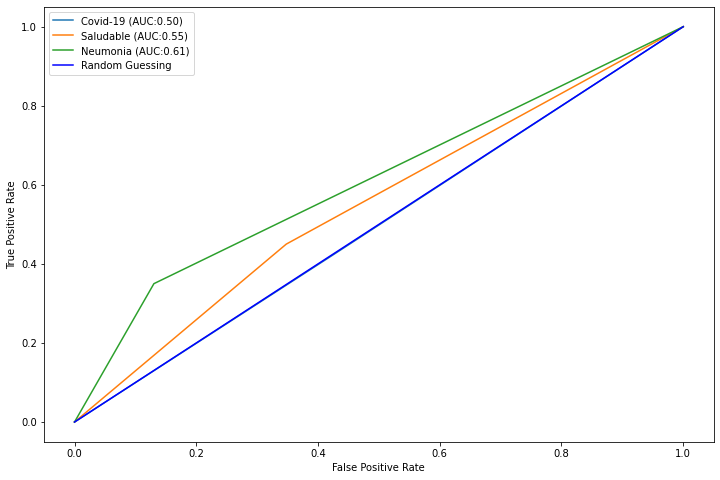

In [10]:
from matplotlib import pyplot as plt 
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score
import numpy as np

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')

plt.title('Entrenamiento Red Neuronal (Accuracy)')
plt.xlabel('Épocas')
plt.legend(loc="lower right")
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='validation loss')

plt.title('Entrenamiento Red Neuronal (Loss)')
plt.xlabel('Épocas')
plt.legend(loc="lower right")
plt.show()

Y_pred = model.predict(validation_generator, 66 // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)

print('----------Confusion Matrix----------')
print(confusion_matrix(validation_generator.classes, y_pred))

target= ['Covid-19', 'Saludable', 'Neumonia']
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)

    for (idx, c_label) in enumerate(target):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)

print('ROC AUC score:', multiclass_roc_auc_score(validation_generator.classes, y_pred))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()

##Saving

In [ ]:
model.save("mimodelo.h5")

#2. Transfer Learning


El transfer learning es una de las técnicas más importantes empleadas en Deep Learning para el aprendizaje automático en inteligencia artificial. Básicamente se trata de aprovechar una gran cantidad de información relacionada con la resolución de un problema y utilizarla sobre otro distinto, en el que se compartan ciertas características. En otras palabras, consiste en modificar patrones ya entrenados (o redes neuronales) para reconocer ciertas características con el fin de reconocer otras similares.
Ahora, haciendo uso de la red neuronal VGG16 y apoyándonos en el transfer learning, trataremos de mejorar los resultados obtenidos por nuestra red neuronal base. VGG16 es una red neuronal que ha sido entrenada previamente con un conjunto de datos de ImageNet, que contiene 1.4 millones de imágenes de 1000 clases distintas. Lo que haremos es aprovechar la red, eliminando la parte fully connected y añadiendo la correspondiente para nuestro caso, de forma que podamos aprovechar el entrenamiento previo de la red VGG16 para poder mejorar la clasificación de imágenes de nuestro dataset.

##Model

In [11]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout, Flatten
from keras.models import Model
import keras
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix


# DATA SOURCE --------------------------------------------------

batch_size = 32

train_data_dir = '/content/drive/MyDrive/dataset/Covid19_TRAIN/train'
validation_data_dir = '/content/drive/MyDrive/dataset/COVID-19_TEST/test'

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=15,
        zoom_range=0.1
)

validation_datagen = ImageDataGenerator(
        rescale=1./255
)

train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(300, 300),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(300, 300),
        batch_size=batch_size,
        class_mode='categorical')


# MODEL --------------------------------------------------

conv_base = VGG16(include_top=False, weights='imagenet', input_shape=(300, 300, 3))
top_model = Flatten()(conv_base.output)
top_model = Dense(128, activation='relu')(top_model)
top_model = Dropout(0.5)(top_model)
output_layer = Dense(3, activation='softmax')(top_model)
model = Model(inputs=conv_base.inputs, outputs=output_layer)
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

print("\n-----------------------> Resumen del modelo <---------------------\n")
model.summary()

Found 251 images belonging to 3 classes.
Found 66 images belonging to 3 classes.
58900480/58889256 [==============================] - 0s 0us/step

-----------------------> Resumen del modelo <---------------------

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 300, 300, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 300, 300, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 300, 300, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 150, 150, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 150, 150, 128)     73856     
____________________________________________

##Training


In [12]:
# TRAINING --------------------------------------------------

epochs = 50

es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=3, restore_best_weights=True)

history = model.fit_generator(
        train_generator,
        epochs=epochs,
        validation_data = validation_generator,
        callbacks = [es]
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
8/8 [==============================] - 868s 109s/step - loss: 1.2551 - accuracy: 0.4180 - val_loss: 1.1610 - val_accuracy: 0.3939
Epoch 2/50
8/8 [==============================] - 865s 111s/step - loss: 1.2103 - accuracy: 0.4230 - val_loss: 1.0845 - val_accuracy: 0.4242
Epoch 3/50
8/8 [==============================] - 867s 111s/step - loss: 1.0407 - accuracy: 0.4629 - val_loss: 1.0223 - val_accuracy: 0.4545
Epoch 4/50
8/8 [==============================] - 865s 109s/step - loss: 1.0566 - accuracy: 0.4603 - val_loss: 0.9763 - val_accuracy: 0.4848
Epoch 5/50
8/8 [==============================] - 865s 111s/step - loss: 1.0781 - accuracy: 0.4354 - val_loss: 0.9269 - val_accuracy: 0.5606
Epoch 6/50
8/8 [==============================] - 863s 108s/step - loss: 0.9434 - accuracy: 0.5614 - val_loss: 0.8809 - val_accuracy: 0.6364
Epoch 7/50
8/8 [==============================] - 862s 108s/step - loss: 0.9643 - accuracy: 0.5632 - val_loss: 0.8376 - val_accuracy: 0.6818
Epoch 8/50
8/

##Plot

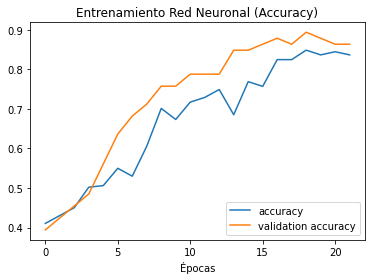

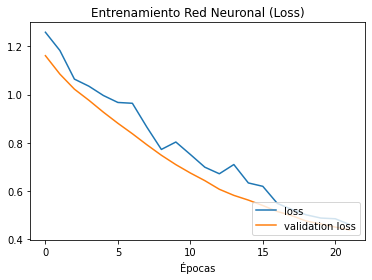

----------Confusion Matrix----------
[[10  7  9]
 [ 8  2 10]
 [ 8  6  6]]
ROC AUC score: 0.44816053511705684


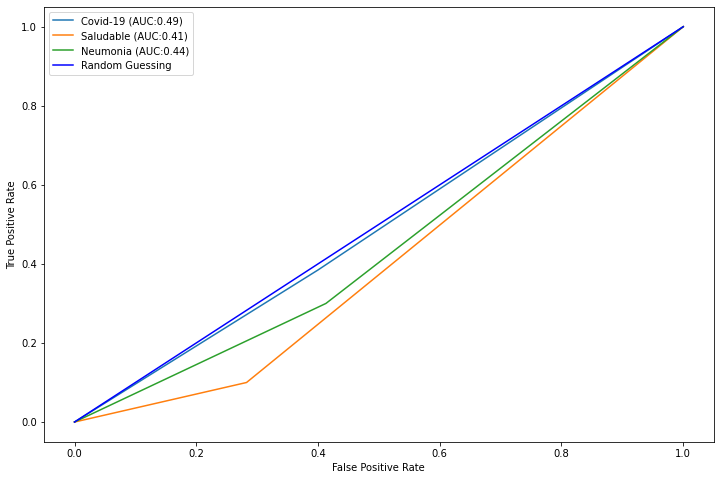

In [24]:
from matplotlib import pyplot as plt 
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score
import numpy as np

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')

plt.title('Entrenamiento Red Neuronal (Accuracy)')
plt.xlabel('Épocas')
plt.legend(loc="lower right")
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='validation loss')

plt.title('Entrenamiento Red Neuronal (Loss)')
plt.xlabel('Épocas')
plt.legend(loc="lower right")
plt.show()

Y_pred = model.predict(validation_generator, 66 // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)

print('----------Confusion Matrix----------')
print(confusion_matrix(validation_generator.classes, y_pred))

target= ['Covid-19', 'Saludable', 'Neumonia']
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)

    for (idx, c_label) in enumerate(target):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)

print('ROC AUC score:', multiclass_roc_auc_score(validation_generator.classes, y_pred))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()

##Save

In [ ]:
# SAVING --------------------------------------------------

model.save("mimodelo.h5")

#3. Informe

##Distintas configuraciones de hiperparámetros

A continuación vamos a exponer los resultados obtenidos tras cambiar ciertos hiperparámetros, observando posibles diferencias y el grado en que estos influyen en dichos resultados.

###Configuración base con tamaño de imagen 400 x 400
Como podemos observar, los resultados obtenidos al reducir el tamaño de imagen de 500 x 500 a 400 x 400 son muy similares. Cabe destacar que el tamaño de imagen influye directamente en la velocidad de entrenamiento ya que cuanto mayor es el tamaño de la imagen, más tardará. Además, estudios afirman que también influye en los resultados obtenidos (accuracy), puesto que una imagen de mayor resolución tendrá mejores detalles, pero depende en gran medida de otros aspectos como los elementos que queremos clasificar o la base de datos con la que estamos trabajando. 


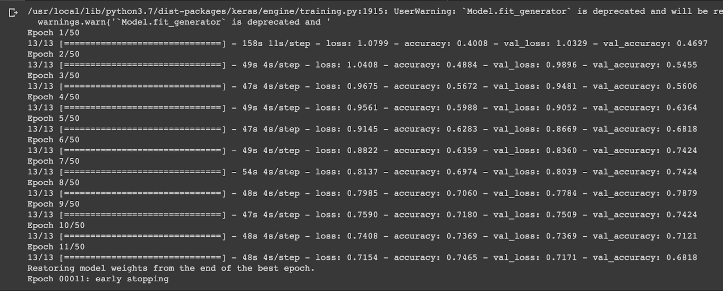
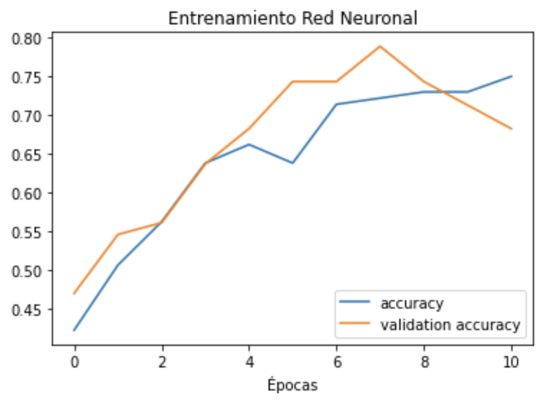

###Configuración con tamaño de kernel 5 x 5
Como sabemos, el kernel en redes convolucionales es una especie de filtro que se aplica a una imagen para extraer ciertas características importantes o patrones de la misma. Las funciones más importantes del kernel es la detección de bordes, enfoque, desenfoque, etc. Por lo tanto, el tamaño del kernel hará que se detecten entidades de diferentes tamaños en la imagen de entrada, y a su vez dará como resultado mapas de características de diferentes tamaños. Normalmente el tamaño suele ser 3 x 3 o 5 x 5, e incluso 7 x 7 para tamaños de imagen de entrada muy grandes. Como podemos observar, los resultados obtenidos al cambiar el tamaño del kernel de 3 x 3 a 5 x 5 no son considerables, pues son bastante similares entre ellos, por lo que podemos afirmar que el tamaño del kernel no influye considerablemente en los resultados obtenidos, para este caso.

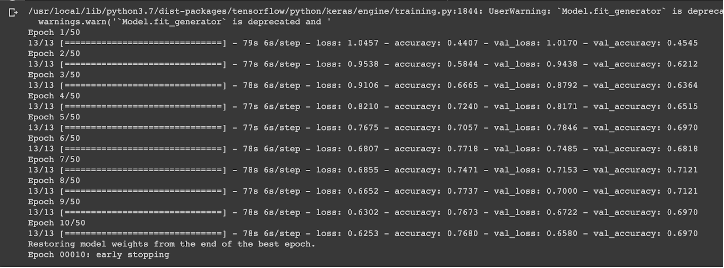
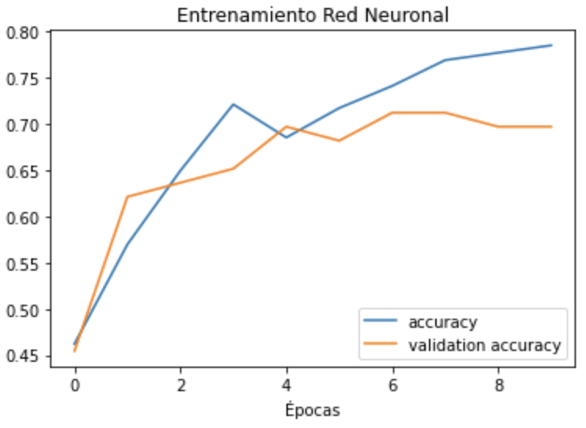

###Configuración con método de optimización SGD
Los optimizadores son algoritmos o métodos que son empleados para modificar los atributos de la red neuronal como los pesos o la tasa de aprendizaje para minimizar el error. Como podemos observar en las imágenes de abajo, los resultados obtenidos tras cambiar el optimizador Adadelta por SGD no influye de forma considerable en los mismos.


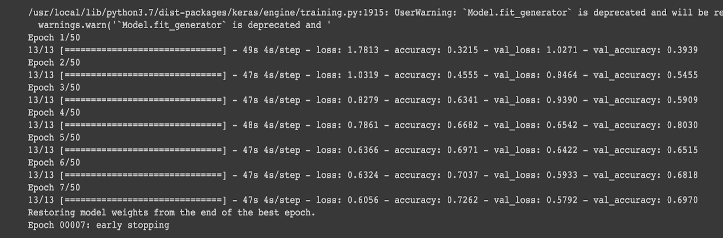
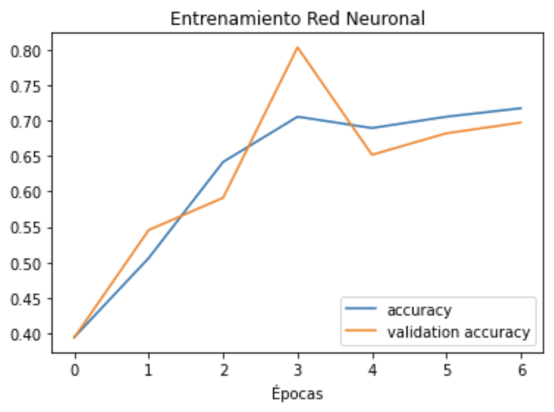

##Función de pérdida Categorical Cross Entropy
Las funciones de pérdida se utilizan para optimizar el modelo durante el entrenamiento. Normalmente, el objetivo es minimizar esta función, puesto que, cuanto menor sea la pérdida, mejor será el modelo. La pérdida de entropía cruzada (cross entropy) es una función de costo muy importante que se utiliza para optimizar los modelos de clasificación. La comprensión de dicha función pasa por el entendimiento de la función de activación Softmax. Para ello, vamos a explicarlo mediante un ejemplo:
Supongamos que queremos clasificar 4 clases en la que una imagen se clasifica como un perro, gato, caballo o guepardo (Imagen inferior).

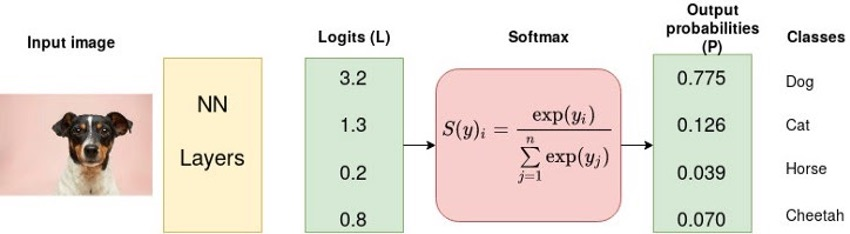

En esta figura, Softmax convierte logits en probabilidades, y el objetivo de la entropía cruzada es tomar las probabilidades de salida y medir la distancia desde los valores de verdad (Imagen inferior).

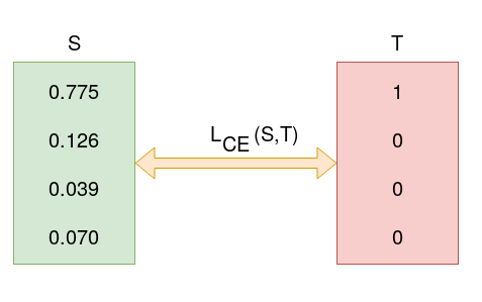

Para este ejemplo, la salida deseada es [1, 0, 0, 0] para la clase perro pero las salidas del modelo son [0.775, 0.126, 0.039, 0.070]. El objetivo es hacer que la salida del modelo sea lo más cercana posible a la salida deseada. Durante el entrenamiento del modelo, los pesos del modelo se ajustan iterativamente en consecuencia con el objetivo de minimizar la pérdida de entropía cruzada. El proceso de ajustar los pesos es lo que define el entrenamiento del modelo y como el modelo sigue entrenando la pérdida se minimiza, por lo que decimos que el modelo está aprendiendo.